In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt

import nestle
from IPython import display

/home/kyle/.conda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Define the posterior density to be sampled:
tmax = 5.0 * np.pi
constant = np.log(1.0 / tmax**2)

def loglhood(x):
    t = 2.0 * tmax * x - tmax
    return (2.0 + np.cos(t[0]/2.0)*np.cos(t[1]/2.0))**5.0

def prior(x):
    return x

<IPython.core.display.Javascript object>


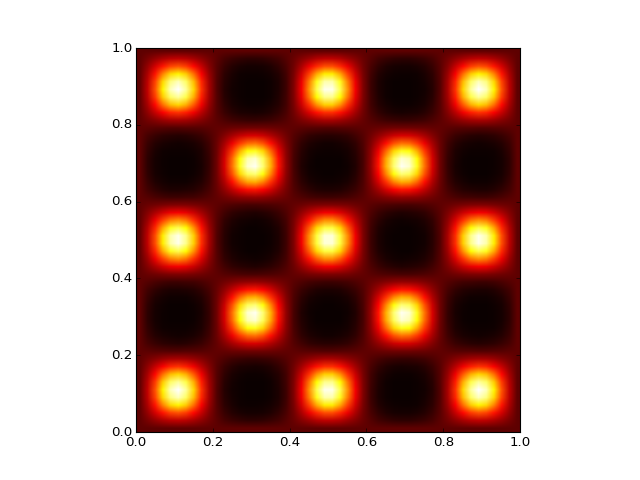

In [3]:
# plot the surface
t0, t1 = np.meshgrid(np.linspace(0., 1., 50),
                     np.linspace(0., 1., 50))
z = loglhood(np.array([t0, t1]))
plt.imshow(z, extent=(0., 1., 0., 1.), cmap='hot')
ax = plt.gca()
fig = plt.gcf()

In [4]:
current_points = None
current_ells = []
def plot_progress(x, ells):
    global current_points
    global current_ells
    if current_points is not None:
        current_points.remove()
    current_points = ax.scatter(x[:, 0], x[:, 1])
    
    while(len(current_ells)>0):
        current_ells.pop().remove()
    for ell in ells:
        current_ells.append(ell.plot(ax))
    display.clear_output(wait=True)
    display.display(fig)

In [7]:
res = nestle.sample(loglhood, prior, 2, npoints=100, method='multi', enlarge=1.5, callback=nestle.print_progress,
                    plot_callback=None)

iter=  1018 logz=236.139122

In [8]:
res

     logz: 236.17406749669107
        h: 5.8409113732603828
    ncall: 4851
     logl: array([   1.16872195,    1.51386441,    2.65525988, ...,  242.97627476,
        242.96876233,  242.97666036])
  logzerr: 0.2416797751832036
  weights: array([  8.63585912e-105,   1.20741362e-104,   3.74295735e-104, ...,
         3.37831630e-004,   3.35303203e-004,   3.37961922e-004])
    niter: 1019
  samples: array([[ 0.28584023,  0.49234671],
       [ 0.32604927,  0.89411578],
       [ 0.13435672,  0.32655604],
       ..., 
       [ 0.29995591,  0.29931231],
       [ 0.90057693,  0.89945927],
       [ 0.49952407,  0.89950945]])
 logprior: array([ -4.61016602,  -4.62016602,  -4.63016602, ..., -14.79517019,
       -14.79517019, -14.79517019])